In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
biometric_df = pd.read_csv("api_data_aadhar_biometric_0_500000.csv")

In [26]:
biometric_df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [27]:
biometric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          500000 non-null  object
 1   state         500000 non-null  object
 2   district      500000 non-null  object
 3   pincode       500000 non-null  int64 
 4   bio_age_5_17  500000 non-null  int64 
 5   bio_age_17_   500000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 22.9+ MB


### Date Parsing

In [28]:
biometric_df["date"] = pd.to_datetime(
    biometric_df["date"],
    format="%d-%m-%Y"
)


### Total Biometric Transactions

In [29]:
biometric_df["total_biometric"] = (
    biometric_df["bio_age_5_17"] +
    biometric_df["bio_age_17_"]
)

### Daily Biometric Activity Trend

In [30]:
daily_bio = (
    biometric_df
    .groupby("date")["total_biometric"]
    .sum()
)

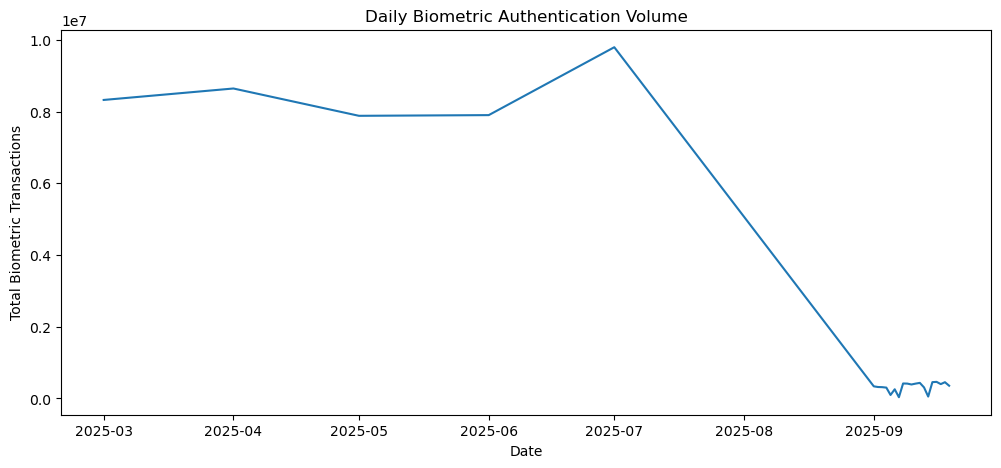

In [31]:
plt.figure(figsize=(12,5))
plt.plot(daily_bio)
plt.title("Daily Biometric Authentication Volume")
plt.xlabel("Date")
plt.ylabel("Total Biometric Transactions")
plt.savefig("daily_biometric_trend.png", dpi=300, bbox_inches="tight")
plt.show()

### Age-wise Biometric Trend Over Time

In [32]:
age_bio_trend = (
    biometric_df
    .groupby("date")[["bio_age_5_17", "bio_age_17_"]]
    .sum()
)

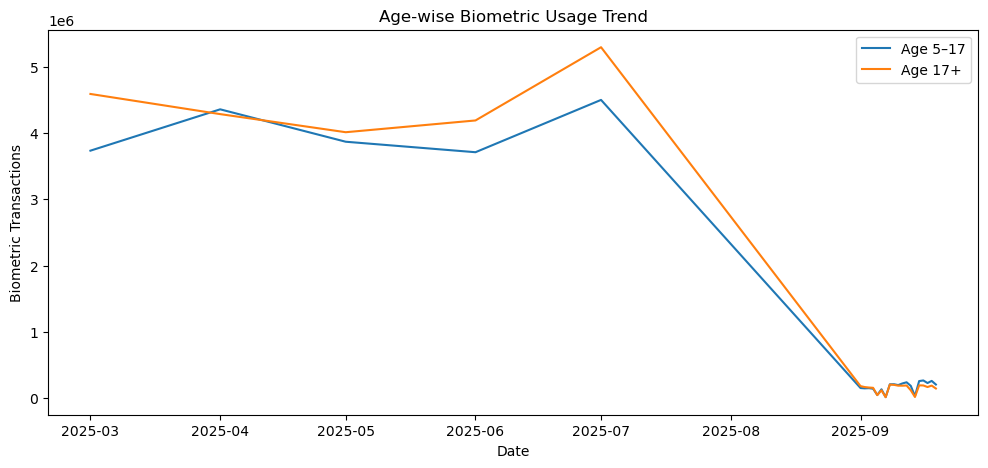

In [49]:
plt.figure(figsize=(12,5))
plt.plot(age_bio_trend)
plt.title("Age-wise Biometric Usage Trend")
plt.xlabel("Date")
plt.ylabel("Biometric Transactions")
plt.legend(["Age 5–17", "Age 17+"])
plt.savefig("age_wise_biometric_trend.png", dpi=300, bbox_inches="tight")
plt.show()

### State-wise Biometric Load

In [34]:
state_bio = (
    biometric_df
    .groupby("state")["total_biometric"]
    .sum()
    .sort_values(ascending=False)
)

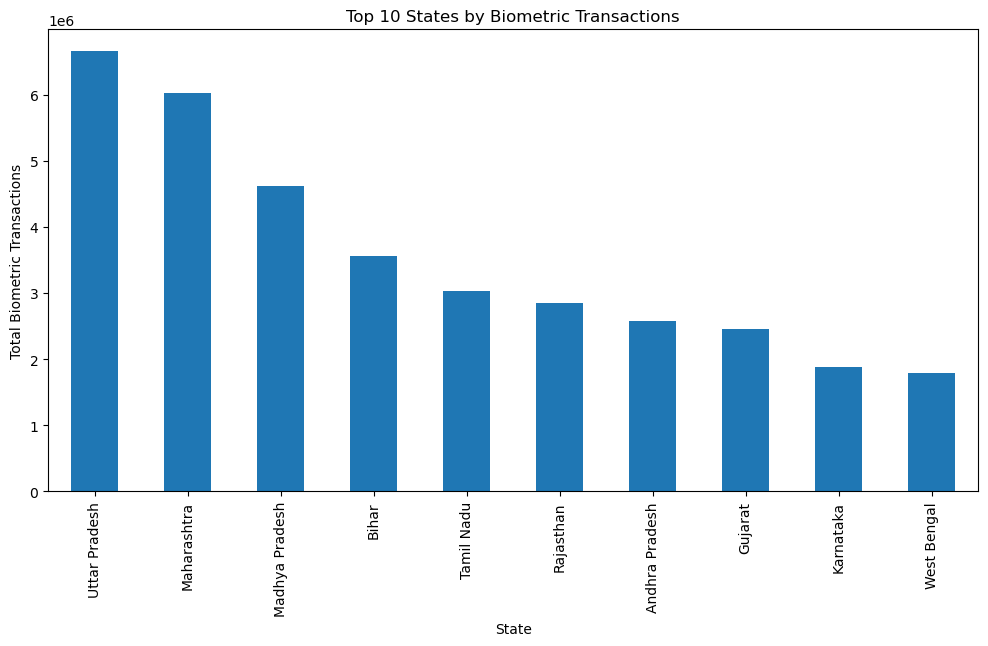

In [35]:
plt.figure(figsize=(12,6))
state_bio.head(10).plot(kind="bar")
plt.title("Top 10 States by Biometric Transactions")
plt.xlabel("State")
plt.ylabel("Total Biometric Transactions")

plt.show()

### District Hotspots (Operational Stress Points)

In [36]:
district_bio = (
    biometric_df
    .groupby("district")["total_biometric"]
    .sum()
    .sort_values(ascending=False)
)

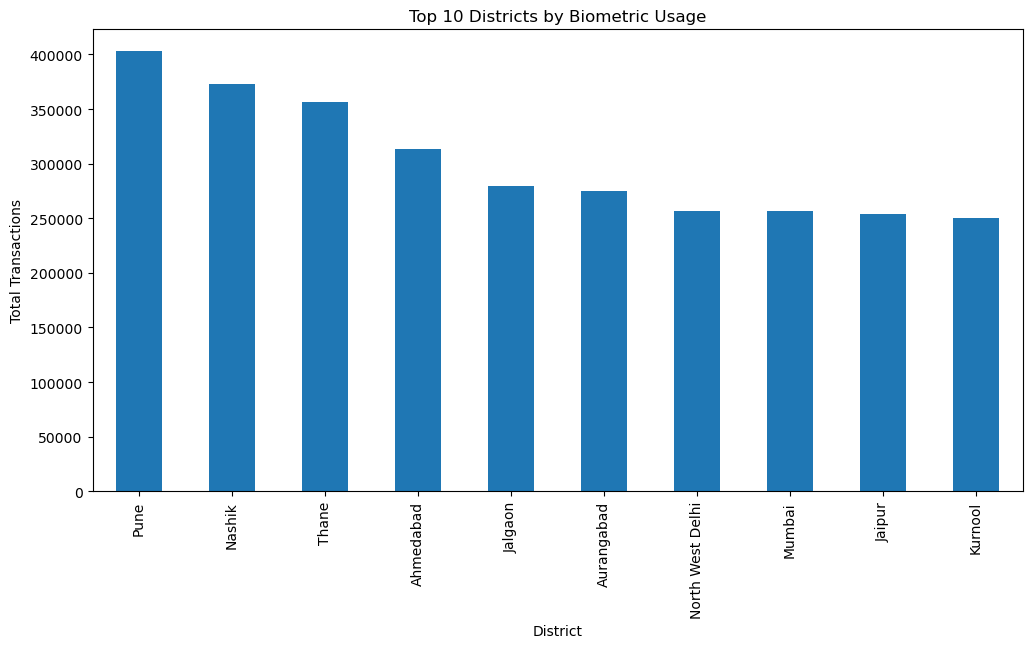

In [37]:
plt.figure(figsize=(12,6))
district_bio.head(10).plot(kind="bar")
plt.title("Top 10 Districts by Biometric Usage")
plt.xlabel("District")
plt.ylabel("Total Transactions")
plt.show()

### Pincode-Level Distribution

In [38]:
pincode_bio = (
    biometric_df
    .groupby("pincode")["total_biometric"]
    .sum()
)

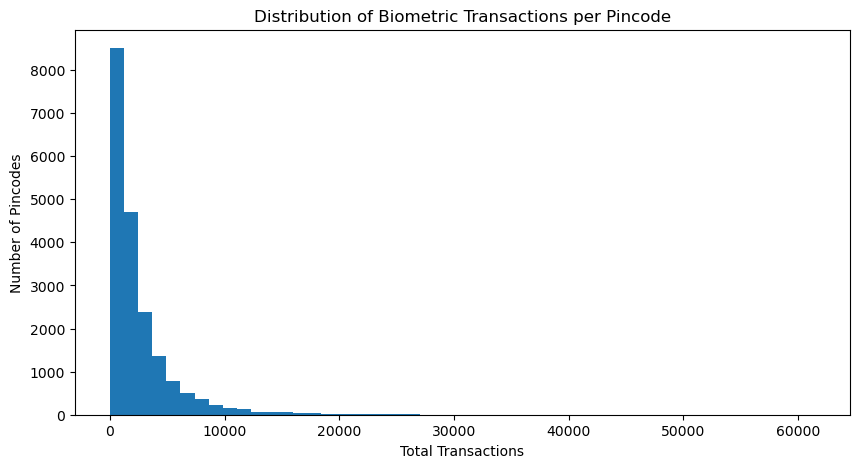

In [39]:
plt.figure(figsize=(10,5))
plt.hist(pincode_bio, bins=50)
plt.title("Distribution of Biometric Transactions per Pincode")
plt.xlabel("Total Transactions")
plt.ylabel("Number of Pincodes")
plt.show()

### Adult vs Child Biometric Usage Share

In [40]:
child_bio = biometric_df["bio_age_5_17"].sum()
adult_bio = biometric_df["bio_age_17_"].sum()

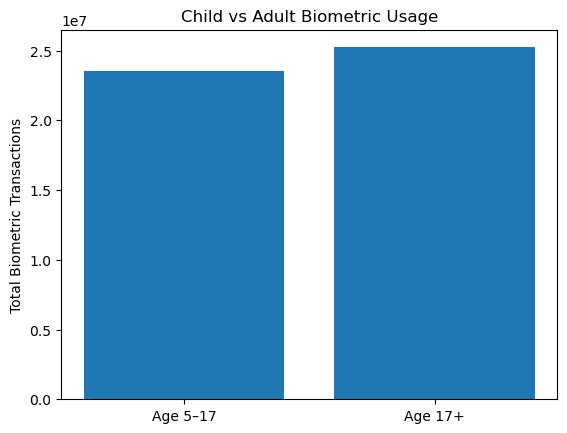

In [47]:
plt.figure()
plt.bar(
    ["Age 5–17", "Age 17+"],
    [child_bio, adult_bio]
)
plt.title("Child vs Adult Biometric Usage")
plt.ylabel("Total Biometric Transactions")
plt.savefig("child_vs_adult_biometric_usage.png", dpi=300, bbox_inches="tight")
plt.show()

### Monthly Biometric Trend (Seasonality)

In [42]:
monthly_bio = (
    biometric_df
    .groupby(biometric_df["date"].dt.to_period("M"))["total_biometric"]
    .sum()
)

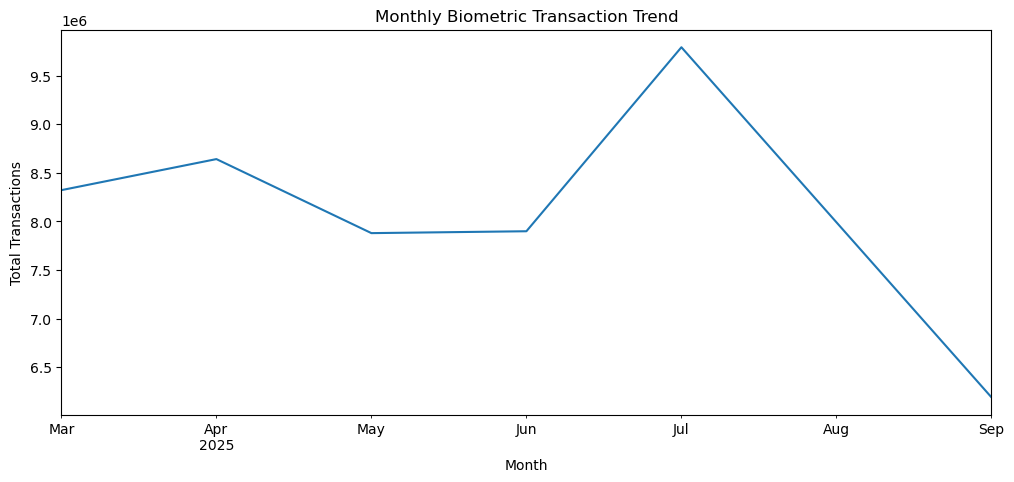

In [46]:
plt.figure(figsize=(12,5))
monthly_bio.plot()
plt.title("Monthly Biometric Transaction Trend")
plt.xlabel("Month")
plt.ylabel("Total Transactions")
plt.savefig("monthly_biometric_trend.png", dpi=300, bbox_inches="tight")
plt.show()

### Biometric Load Concentration (High-Impact Insight)

In [44]:
pincode_sorted = pincode_bio.sort_values(ascending=False)

cumulative_share = (
    pincode_sorted.cumsum() /
    pincode_sorted.sum()
)

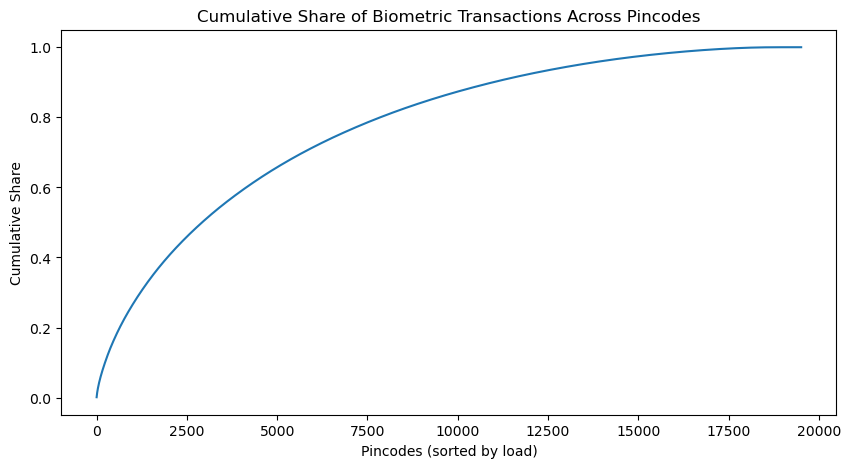

In [48]:
plt.figure(figsize=(10,5))
plt.plot(cumulative_share.values)
plt.title("Cumulative Share of Biometric Transactions Across Pincodes")
plt.xlabel("Pincodes (sorted by load)")
plt.ylabel("Cumulative Share")
plt.savefig("cumulative_biometric_pincode_share.png", dpi=300, bbox_inches="tight")
plt.show()